In [1]:
from sklearn import datasets

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [13]:
import pandas as pd

In [5]:
sns.set()

## irisデータのよみこみ

In [27]:
iris = datasets.load_iris()

In [7]:
# 3,4列めの特徴量を抽出
X = iris.data[:,[2,3]]

In [8]:
# クラスラベルを抽出
y = iris.target

In [28]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [30]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [31]:
type(iris)

sklearn.utils.Bunch

In [32]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


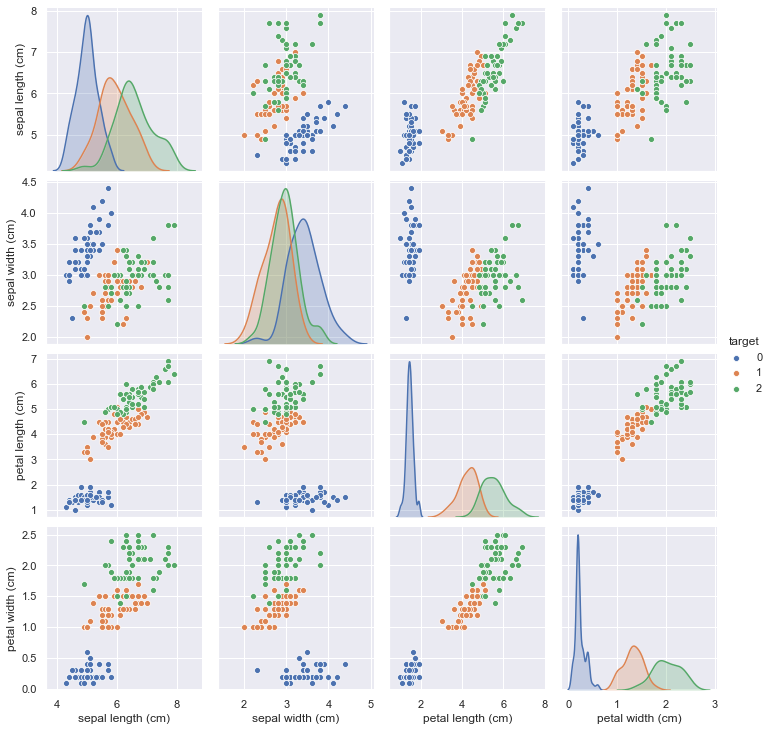

In [33]:
sns.pairplot(df,hue="target")

In [38]:
cr_matrix = df.corr()

In [39]:
cr_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


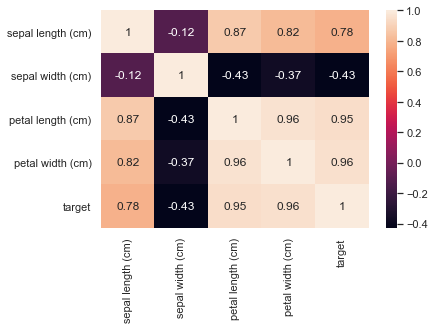

In [40]:
sns.heatmap(cr_matrix, annot=True)

In [22]:
type(X)

numpy.ndarray

In [23]:
type(y)

numpy.ndarray

In [24]:
#　ラベルの種類を出す
np.unique(y)

array([0, 1, 2])

## テストデータとトレーニングデータに分割

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#stratifyでyに含まれるクラスの比率をtrainとtestで同じ比率にできる
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,
                                                random_state=43,stratify=y)

In [27]:
np.bincount(y)

array([50, 50, 50])

In [28]:
np.bincount(y_train)

array([35, 35, 35])

In [29]:
np.bincount(y_test)

array([15, 15, 15])

In [30]:
##　上で比率が同じになっているのが確認できる

## 特徴データの標準化

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
le = StandardScaler()

In [33]:
le.fit(X_train)

StandardScaler()

In [34]:
#計算ずみのleにデータを当てはめる
X_train_std = le.transform(X_train)
X_test_std = le.transform(X_test)

In [35]:
X_train_std.mean()

-4.567774729886358e-16

 ## パーセプトロンで実装　一番しょぼいやつ

In [36]:
from sklearn.linear_model import Perceptron

In [37]:
#エポック数(n_iterからmax_iterに変更された模様)=20,学習りつ0.01で学習
ppn = Perceptron(max_iter=10,eta0=0.00001,random_state=43)

In [38]:
ppn.fit(X_train_std,y_train)

Perceptron(eta0=1e-05, max_iter=10, random_state=43)

In [39]:
#予測 
y_pred = ppn.predict(X_test_std)

In [40]:
#誤ったサンプルの個数を算出
print("誤った個数:",(y_pred != y_test).sum())

誤った個数: 3


In [41]:
#正答率の算出
ppn.score(X_test_std,y_test)

0.9333333333333333

## ppnのプロット

In [42]:
from matplotlib.colors import ListedColormap

In [43]:
def plot_decision_regions(X,y,clf,test_idx,resolution=0.02):
    
    #マーカーとカラーマップの用意
    markers = ["s","x","o","^","v"]
    colors = ["red","blue","lightgreen","gray","cyan"]
    #yのラベルの数だけcolorsの色を前から使うことを宣言している 
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #決定領域のプロット
    x1_min,x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max()+1
    
    #グリッドポイントを生成
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max,resolution))
    
    #各特徴量を1次元配列に直して予測を実行
    Z = clf.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    
    #予測結果をもとのグリッドポイントデータサイズに変更
    Z =Z.reshape(xx1.shape)
    
    #グリッドポイントの等高線をプロット
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    #軸の範囲の固定
    plt.xlim (xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #クラスごとにサンプルをプロット
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolors="black")
        
    #テストサンプルを目立たせる
    if test_idx:
        X_test,y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],
                   c = "",
                   edgecolors="black",
                   alpha=1,
                   linewidths=1,
                   marker = "o",
                   s =100,
                   label = "test set")

In [44]:
#トレーニングデータとテストデータの統合
X_combined_std = np.concatenate((X_train_std,X_test_std),axis=0)
y_combined = np.hstack((y_train,y_test))


In [45]:
len(X_train_std)

105

/Users/ryusei/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


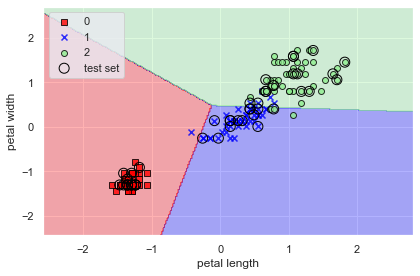

In [46]:
#決定境界のプロット
plot_decision_regions(X = X_combined_std,y = y_combined,
                     clf = ppn,
                     test_idx=range(105,150)) #テストデータの数分
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(loc = "upper left") #左上に 凡例を表示
plt.tight_layout()
plt.show()

## ロジスティック回帰

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
lr = LogisticRegression(C=10.0,random_state=1) #Cは重み係数　
lr.fit(X_train_std,y_train)

LogisticRegression(C=10.0, random_state=1)

In [49]:
#予測 
y_pred_lr = lr.predict(X_test_std)

In [50]:
#誤ったサンプルの個数を算出
print("誤った個数:",(y_pred_lr != y_test).sum())

誤った個数: 1


In [51]:
lr.score(X_test_std,y_test)

0.9777777777777777

In [52]:
X_train_std.shape

(105, 2)

In [53]:
y_train.shape

(105,)

## ロジスティック回帰のプロット

/Users/ryusei/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


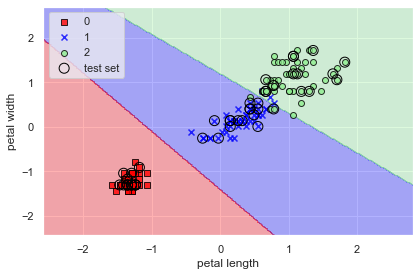

In [54]:
#決定境界のプロット
plot_decision_regions(X = X_combined_std,y = y_combined,
                     clf = lr,
                     test_idx=range(105,150)) #テストデータの数分
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(loc = "upper left") #左上に 凡例を表示
plt.tight_layout()
plt.show()

## サポートベクターマシンでの実装

In [55]:
from sklearn.svm import SVC

In [56]:
svm = SVC(kernel="linear",C = 10000.0 , random_state=1) #Cが大きいほど敏感になる→過学習の元

In [57]:
svm.fit(X_train_std,y_train)

SVC(C=10000.0, kernel='linear', random_state=1)

In [58]:
svm.score(X_test_std,y_test)

0.9777777777777777

## サポートベクターマシンのプロット　

/Users/ryusei/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


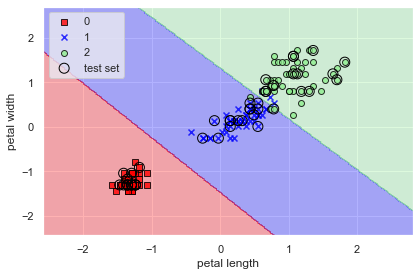

In [59]:
#決定境界のプロット
plot_decision_regions(X = X_combined_std,y = y_combined,
                     clf = svm,
                     test_idx=range(105,150)) #テストデータの数分
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(loc = "upper left") #左上に 凡例を表示
plt.tight_layout()
plt.show()

## サポートベクターマシンにrbfカーネルを適用する

In [60]:
#gammaが高いほどトレーニングデータに適用したグラフになる
#gammaが低いもの
svm_rbf_lowgamma = SVC(kernel="rbf",random_state=1,gamma=1.0,C=1.0) 

In [61]:
#gammaが高いもの
svm_rbf_highgamma = SVC(kernel="rbf",random_state=1,gamma =100.0,C = 1.0)

In [62]:
svm_rbf_lowgamma.fit(X_train_std,y_train)

SVC(gamma=1.0, random_state=1)

In [63]:
svm_rbf_highgamma.fit(X_train_std,y_train)

SVC(gamma=100.0, random_state=1)

In [64]:
svm_rbf_lowgamma.score(X_test_std,y_test)

0.9777777777777777

In [65]:
svm_rbf_highgamma.score(X_test_std,y_test)  #トレーニングに適用しすぎた

0.8888888888888888

## gamma=1とgamma =100のsvmのプロット

/Users/ryusei/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


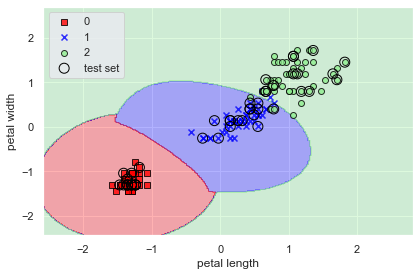

In [66]:
#gammaが低い場合
plot_decision_regions(X = X_combined_std,y = y_combined,
                     clf = svm_rbf_lowgamma,
                     test_idx=range(105,150)) #テストデータの数分
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(loc = "upper left") #左上に 凡例を表示
plt.tight_layout()
plt.show()

/Users/ryusei/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


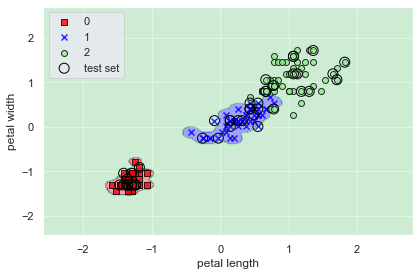

In [67]:
#gammaが高い場合
#gammaが低い場合
plot_decision_regions(X = X_combined_std,y = y_combined,
                     clf = svm_rbf_highgamma,
                     test_idx=range(105,150)) #テストデータの数分
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(loc = "upper left") #左上に 凡例を表示
plt.tight_layout()
plt.show()

## 決定木の実装

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
#ジニ不純度を指標とする決定木を構成
tree = DecisionTreeClassifier(criterion="gini",max_depth=6,random_state=1)

In [70]:
#決定木は数値の大小で判断を下すため標準化の必要がない
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [71]:
#標準化していないトレーニングデータとテストデータの合成データを作成
X_combined = np.vstack((X_train,X_test))

## 決定木のプロット

/Users/ryusei/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


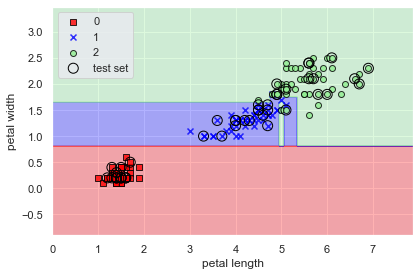

In [72]:
#決定境界のプロット
plot_decision_regions(X = X_combined,y = y_combined,
                     clf = tree,
                     test_idx=range(105,150)) #テストデータの数分
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(loc = "upper left") #左上に 凡例を表示
plt.tight_layout()
plt.show()

### 決定木の可視化データの保存

In [73]:
from pydotplus import graph_from_dot_data

In [74]:
from sklearn.tree import export_graphviz

In [75]:
dot_data = export_graphviz(tree,
                          filled=True,
                          rounded =True,
                          class_names=["Setosa","Versicolor","Virginica"],
                          feature_names=["petal length","petal width"],
                          out_file =None)
graph = graph_from_dot_data(dot_data)
graph.write_png("tree.png")

True

## ランダムフォレストの実装

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
#決定木がたくさん集まっているからフォレスト
forest = RandomForestClassifier(criterion="gini",
                               n_estimators=25,  #決定木の数
                               random_state=1,
                               n_jobs=2)

In [78]:
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=25, n_jobs=2, random_state=1)

In [79]:
forest.score(X_test,y_test)

0.9777777777777777

In [80]:
forest.feature_importances_

array([0.49283018, 0.50716982])

In [81]:
forest.n_outputs_

1

## ランダムフォレストのプロット

/Users/ryusei/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


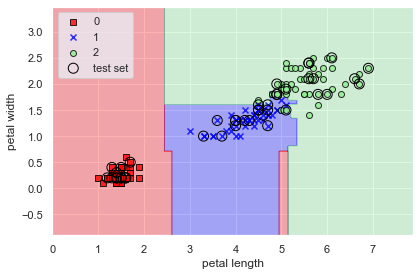

In [82]:
#決定境界のプロット
plot_decision_regions(X = X_combined,y = y_combined,
                     clf = forest,
                     test_idx=range(105,150)) #テストデータの数分
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(loc = "upper left") #左上に 凡例を表示
plt.tight_layout()
plt.show()

## k-meansの実装

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn = KNeighborsClassifier(n_neighbors=8,
                          p=2,
                          metric="minkowski")

In [85]:
knn.fit(X_train_std,y_train)

KNeighborsClassifier(n_neighbors=8)

In [86]:
knn.score(X_test_std,y_test)

0.9777777777777777

## k-meansのプロット

/Users/ryusei/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


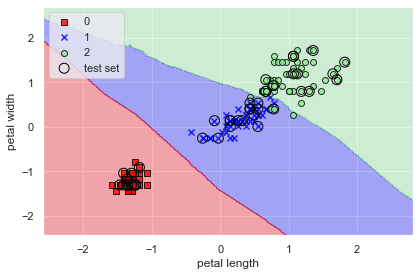

In [87]:
#決定境界のプロット
plot_decision_regions(X = X_combined_std,y = y_combined,
                     clf = knn,
                     test_idx=range(105,150)) #テストデータの数分
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(loc = "upper left") #左上に 凡例を表示
plt.tight_layout()
plt.show()

## XGboostの実装  
参考記事  
https://www.kaggle.com/kawakeee/titanic-xgboost-xgbclassifier

https://qiita.com/yhyhyhjp/items/c81f7cea72a44a7bfd3a

In [89]:
from xgboost import XGBClassifier

In [91]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
#グリッドサーチの範囲を指定
parameters = {
     "n_estimators":[i for i in range(10,100,10)],
     "learning_rate":[10,1,0.1,0.01],
     "max_depth":[i for i in range(1,5,1)],
     "random_state":[3],
 }
# #交差検証+グリッドサーチにより最良パラメータの検索
clf = GridSearchCV(XGBClassifier(), parameters, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [92]:
print("最良パラメータ: {}".format(clf.best_params_))
print("最良交差検証スコア: {:.2f}".format(clf.best_score_))

最良パラメータ: {'learning_rate': 1, 'max_depth': 2, 'n_estimators': 10, 'random_state': 3}
最良交差検証スコア: 0.95


In [98]:
xgb_tree = XGBClassifier(max_depth=2, learning_rate=1, n_estimators=10, random_state=3)
# 予測モデルを訓練させる
xgb_tree.fit(X_train, y_train)
# 適合具合を確認 0.8316498316498316
print("訓練データスコア:",xgb_tree.score(X_train,y_train))
print("テストデータスコア",xgb_tree.score(X_test,y_test))

訓練データスコア: 0.9809523809523809
テストデータスコア 1.0


/Users/ryusei/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


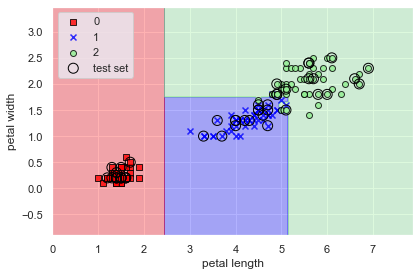

In [97]:
#決定境界のプロット
plot_decision_regions(X = X_combined,y = y_combined,
                     clf = xgb_tree,
                     test_idx=range(105,150)) #テストデータの数分
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend(loc = "upper left") #左上に 凡例を表示
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'tenssorflow'